In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=73453ff8b2d0724411fff28af16f1b179f09260f0ac5ffe21986cb8a4d91f38d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 13.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import json
from langdetect import detect
import csv
import contractions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving London_hotel_reviews.csv to London_hotel_reviews.csv


In [ ]:
data_file_1 = pd.read_csv('/content/London_hotel_reviews.csv', encoding_errors = 'ignore')
data_file_1

,Property Name,Review Rating,Review Text
0,Apex London Wall Hotel,5,Siamo stati a Londra per un week end ed abbiam...
1,Corinthia Hotel London,5,I had a pleasure of staying in this hotel for ...
2,The Savoy,5,A very lovely first visit to this iconic hotel...
3,Rhodes Hotel,4,3 of us stayed at the Rhodes Hotel for 4 night...
4,The Savoy,5,Form the moment we arrived until we left we ex...
...,...,...,...
26872,Corinthia Hotel London,5,I come to London often but since I stayed in t...
26873,A To Z Hotel,3,En cuarto que nos toc no haba toallas y haba u...
26874,The Rembrandt,4,This is a quality quiet hotel located in an ex...
26875,The Dorchester,4,"Vldigt vackra rum, tyvrr med en mycket hgljud ..."


In [ ]:
for index, row in data_file_1.iterrows():
  language = detect(data_file_1.at[index, 'Review Text'])
  if (language != 'en'):
    data_file_1 = data_file_1.drop(index)

In [ ]:
data_file_1.to_csv("/content/London_reviews_cleaned.csv", index = False)

In [ ]:
cleaned_file = pd.read_csv("/content/London_reviews_cleaned.csv")
cleaned_file

,Property Name,Review Rating,Review Text
0,Corinthia Hotel London,5,I had a pleasure of staying in this hotel for ...
1,The Savoy,5,A very lovely first visit to this iconic hotel...
2,Rhodes Hotel,4,3 of us stayed at the Rhodes Hotel for 4 night...
3,The Savoy,5,Form the moment we arrived until we left we ex...
4,Corinthia Hotel London,1,Well I am no strange to London's 5star hotels ...
...,...,...,...
23523,Mondrian London at Sea Containers,5,Recently came here for a friends birthday. We ...
23524,"Mandarin Oriental Hyde Park, London",4,Greatly located with lovely views of the park ...
23525,Corinthia Hotel London,5,I come to London often but since I stayed in t...
23526,The Rembrandt,4,This is a quality quiet hotel located in an ex...


In [ ]:
target_map = { 5: 2, 4: 2, 1: 0, 2: 0, 3: 1}
cleaned_file['label'] = cleaned_file['Review Rating'].map(target_map)
cleaned_file['sentence'] = cleaned_file['Review Text']
Final_file = cleaned_file[['Property Name', 'sentence', 'label']]

In [ ]:
Final_file.reset_index() # Checking how data looks
Final_file

,Property Name,sentence,label
0,Corinthia Hotel London,I had a pleasure of staying in this hotel for ...,2
1,The Savoy,A very lovely first visit to this iconic hotel...,2
2,Rhodes Hotel,3 of us stayed at the Rhodes Hotel for 4 night...,2
3,The Savoy,Form the moment we arrived until we left we ex...,2
4,Corinthia Hotel London,Well I am no strange to London's 5star hotels ...,0
...,...,...,...
23523,Mondrian London at Sea Containers,Recently came here for a friends birthday. We ...,2
23524,"Mandarin Oriental Hyde Park, London",Greatly located with lovely views of the park ...,2
23525,Corinthia Hotel London,I come to London often but since I stayed in t...,2
23526,The Rembrandt,This is a quality quiet hotel located in an ex...,2


In [ ]:
for index, row in Final_file.iterrows():
  Final_file.at[index, 'sentence'] = Final_file.at[index, 'sentence'].lower()
final_data = Final_file.drop_duplicates() # Removes any duplicated values. Retains the first instance.

In [ ]:
final_data

,Property Name,sentence,label
0,Corinthia Hotel London,i had a pleasure of staying in this hotel for ...,2
1,The Savoy,a very lovely first visit to this iconic hotel...,2
2,Rhodes Hotel,3 of us stayed at the rhodes hotel for 4 night...,2
3,The Savoy,form the moment we arrived until we left we ex...,2
4,Corinthia Hotel London,well i am no strange to london's 5star hotels ...,0
...,...,...,...
23523,Mondrian London at Sea Containers,recently came here for a friends birthday. we ...,2
23524,"Mandarin Oriental Hyde Park, London",greatly located with lovely views of the park ...,2
23525,Corinthia Hotel London,i come to london often but since i stayed in t...,2
23526,The Rembrandt,this is a quality quiet hotel located in an ex...,2


In [ ]:
for index, row in final_data.iterrows():
  expanded_text = []
  text_raw = final_data.at[index, 'sentence']
  text = "'''" + text_raw + "'''"
  # print(text) for debugging
  for word in text.split():
    expanded_text.append(contractions.fix(word))

  expanded_text = ' '.join(expanded_text)
  final_data.at[index, 'sentence'] = expanded_text

In [ ]:
final_data.head(25)

,Property Name,sentence,label
0,Corinthia Hotel London,'''i had a pleasure of staying in this hotel f...,2
1,The Savoy,'''a very lovely first visit to this iconic ho...,2
2,Rhodes Hotel,'''3 of us stayed at the rhodes hotel for 4 ni...,2
3,The Savoy,'''form the moment we arrived until we left we...,2
4,Corinthia Hotel London,'''well i am no strange to london's 5star hote...,0
5,Apex London Wall Hotel,"'''the hotel staff were very helpful, i booked...",2
6,Mondrian London at Sea Containers,'''already stepping out of the taxi you get th...,2
7,Mondrian London at Sea Containers,'''what an incredibly cool place. had the most...,2
8,The Savoy,"'''the savoy is the savoy, every time i came b...",2
9,"Mandarin Oriental Hyde Park, London",'''the location next to the park and close to ...,2


<Axes: >

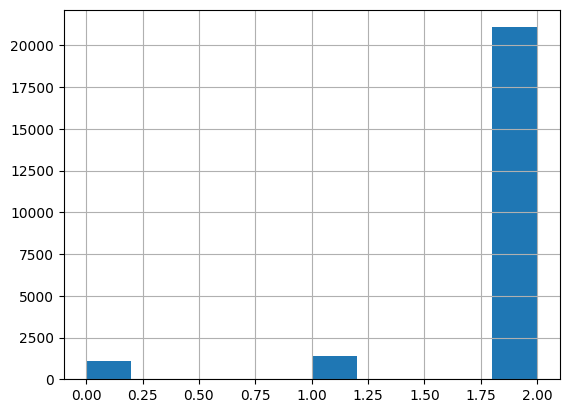

In [ ]:
final_data['label'].hist()

In [ ]:
final_data['label'].value_counts()

2    21080
1     1369
0     1078
Name: label, dtype: int64

In [ ]:
final_data.to_csv("/content/London_hotel_reviews_unbalanced.csv")

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install nlpaug

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.9 MB/s eta 0:00:00


Identifying Majority and Minority classes in each dataset, before conducting balancing.

Balancing is achieved through oversampling the minority (via data augmentation), while undersampling the majority.

In [ ]:
X_majority = []
X_minority1 = []
X_minority2 = []

y_majority = []
y_minority1 = []
y_minority2 = []

hotel_majority = []
hotel_minority1 = []
hotel_minority2 = []


In [ ]:
# Just subsampling, no oversampling

import nlpaug.augmenter.word as naw
import numpy as np

seed_value = 42
np.random.seed(seed_value)

# Load your text data and labels
X, y, hotel = final_data['sentence'].to_list(), final_data['label'].to_list(), final_data['Property Name'].to_list()

# Split the data into majority and minority classes
X_majority = [X[i] for i in range(len(y)) if y[i] == 2]
X_minority1 = [X[i] for i in range(len(y)) if y[i] == 1]
X_minority2 = [X[i] for i in range(len(y)) if y[i] == 0]

y_majority = [2] * len(X_majority)
y_minority1 = [1] * len(X_minority1)
y_minority2 = [0] * len(X_minority2)

hotel_majority = [hotel[i] for i in range(len(y)) if y[i] == 2]
hotel_minority1 = [hotel[i] for i in range(len(y)) if y[i] == 1]
hotel_minority2 = [hotel[i] for i in range(len(y)) if y[i] == 0]

X_augmented_minority1, X_augmented_minority2 = X_minority1, X_minority2
hotel_augmented_minority1, hotel_augmented_minority2 = hotel_minority1, hotel_minority2

y_augmented_minority1 = [1] * len(X_augmented_minority1)
y_augmented_minority2 = [0] * len(X_augmented_minority2)

# Subsample the majority class
n_samples = max(len(X_augmented_minority1), len(X_augmented_minority2))
indices = np.random.choice(len(X_majority), size = n_samples, replace = False)
X_subsampled_majority = [X_majority[i] for i in indices]
hotel_subsampled_majority = [hotel_majority[i] for i in indices]
y_subsampled_majority = [2] * n_samples

# Combine the augmented minority class and subsampled majority class
X_combined = np.concatenate([X_augmented_minority1, X_augmented_minority2, X_subsampled_majority])
y_combined = np.concatenate([y_augmented_minority1, y_augmented_minority2, y_subsampled_majority])
hotel_combined = np.concatenate([hotel_augmented_minority1, hotel_augmented_minority2, hotel_subsampled_majority])

In [ ]:
df1 = pd.DataFrame({'Property Name': hotel_combined, 'sentence': X_combined, 'label': y_combined})
df1

,Property Name,sentence,label
0,Mondrian London at Sea Containers,'''nice visit but did not feel special. upgrad...,1
1,"The Wellesley Knightsbridge, a Luxury Collecti...","'''we stayed for a few days in october, and it...",1
2,The Savoy,"'''lovely furnishings, amenities and service. ...",1
3,Mondrian London at Sea Containers,'''we stayed here for 3 nights and was expecti...,1
4,The Rembrandt,'''visited for a 2 night stay rooms were ok bu...,1
...,...,...,...
3811,The Rembrandt,'''stayed here just for 1 night in april on a ...,2
3812,Ridgemount Hotel,'''we stayed at the ridgemount hotel in london...,2
3813,The Rembrandt,'''the location is south kensington is perfect...,2
3814,The Savoy,'''i have stayed at the savoy a couple of time...,2


<Axes: >

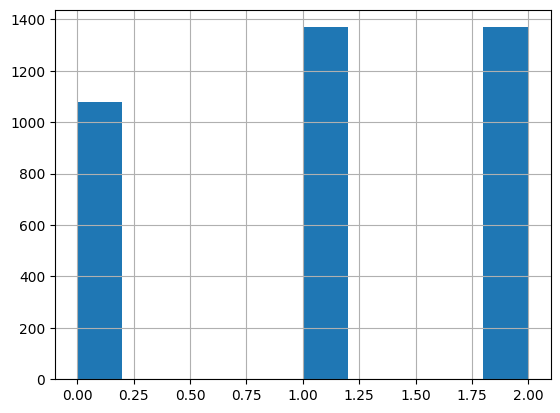

In [ ]:
df1['label'].hist()

In [ ]:
df1['label'].value_counts()

1    1369
2    1369
0    1078
Name: label, dtype: int64

In [ ]:
df1.to_csv('/content/London_hotel_reviews_balanced_only_subsampled.csv', index = False)

In [ ]:
X_majority = []
X_minority1 = []
X_minority2 = []

y_majority = []
y_minority1 = []
y_minority2 = []

hotel_majority = []
hotel_minority1 = []
hotel_minority2 = []


In [ ]:
# Oversampling and subsampling
import nlpaug.augmenter.word as naw
import numpy as np

seed_value = 42
np.random.seed(seed_value)

# Load your text data and labels
X, y, hotel = final_data['sentence'].to_list(), final_data['label'].to_list(), final_data['Property Name'].to_list()

# Split the data into majority and minority classes
X_majority = [X[i] for i in range(len(y)) if y[i] == 2]
X_minority1 = [X[i] for i in range(len(y)) if y[i] == 1]
X_minority2 = [X[i] for i in range(len(y)) if y[i] == 0]

y_majority = [2] * len(X_majority)
y_minority1 = [1] * len(X_minority1)
y_minority2 = [0] * len(X_minority2)

hotel_majority = [hotel[i] for i in range(len(y)) if y[i] == 2]
hotel_minority1 = [hotel[i] for i in range(len(y)) if y[i] == 1]
hotel_minority2 = [hotel[i] for i in range(len(y)) if y[i] == 0]

# Apply data augmentation to the minority class
syn_aug = naw.SynonymAug(aug_src = 'wordnet', aug_max = 2)
# aug_max indicates the number of words in the sentence for which synonyms are found and replaced to perform augmentation.

X_augmented_minority1, X_augmented_minority2 = X_minority1, X_minority2
hotel_augmented_minority1, hotel_augmented_minority2 = hotel_minority1, hotel_minority2

for i in range(len(X_minority1)):
  X_augmented_minority1 += syn_aug.augment(X_minority1[i], n = 5)
  hotel_augmented_minority1 += [hotel_minority1[i]] * 5

for i in range(len(X_minority2)):
  X_augmented_minority2 += syn_aug.augment(X_minority2[i], n = 5)
  hotel_augmented_minority2 += [hotel_minority2[i]] * 5

y_augmented_minority1 = [1] * len(X_augmented_minority1)
y_augmented_minority2 = [0] * len(X_augmented_minority2)

# Subsample the majority class
n_samples = max(len(X_augmented_minority1), len(X_augmented_minority2))
indices = np.random.choice(len(X_majority), size = n_samples, replace = False)
X_subsampled_majority = [X_majority[i] for i in indices]
hotel_subsampled_majority = [hotel_majority[i] for i in indices]
y_subsampled_majority = [2] * n_samples

# Combine the augmented minority class and subsampled majority class
X_combined = np.concatenate([X_augmented_minority1, X_augmented_minority2, X_subsampled_majority])
y_combined = np.concatenate([y_augmented_minority1, y_augmented_minority2, y_subsampled_majority])
hotel_combined = np.concatenate([hotel_augmented_minority1, hotel_augmented_minority2, hotel_subsampled_majority])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df2 = pd.DataFrame({'Property Name': hotel_combined, 'sentence': X_combined, 'label': y_combined})
df2

,Property Name,sentence,label
0,Mondrian London at Sea Containers,'''nice visit but did not feel special. upgrad...,1
1,"The Wellesley Knightsbridge, a Luxury Collecti...","'''we stayed for a few days in october, and it...",1
2,The Savoy,"'''lovely furnishings, amenities and service. ...",1
3,Mondrian London at Sea Containers,'''we stayed here for 3 nights and was expecti...,1
4,The Rembrandt,'''visited for a 2 night stay rooms were ok bu...,1
...,...,...,...
22891,The Savoy,"'''the rooms are splendid. very lovely, if not...",2
22892,Rhodes Hotel,'''the room was very nice the whole place was ...,2
22893,The Rembrandt,'''beautiful hotel at the heart of the city. m...,2
22894,"Bulgari Hotel, London",'''in my opinion the best hotel in mayfair: | ...,2


<Axes: >

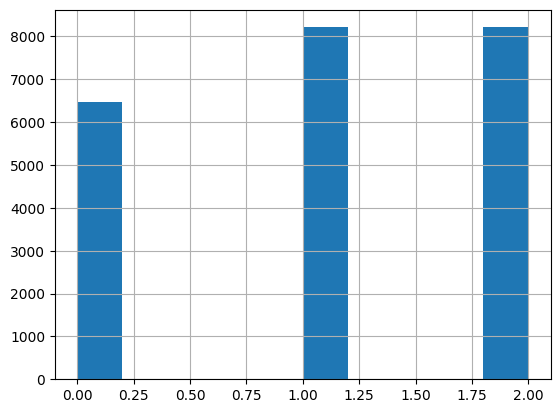

In [ ]:
df2['label'].hist()

In [ ]:
df2['label'].value_counts()

1    8214
2    8214
0    6468
Name: label, dtype: int64

In [ ]:
df2.to_csv('/content/London_hotel_reviews_balanced.csv')

In [2]:
import pandas as pd

df_test = pd.read_csv('/content/London_hotel_reviews_test_small.csv')
df_test

,Property Name,sentence,label,prediction
0,Apex London Wall Hotel,'''although there is nothing wrong with theis ...,1,1
1,The Savoy,'''so this was my first time staying at the sa...,2,1
2,The Dorchester,'''everyone should have the opportunity to sta...,2,2
3,Hartley Hotel,'''please do not stay in this hotel. in name o...,0,0
4,Mondrian London at Sea Containers,'''first time stay here but sadly not impresse...,1,1
...,...,...,...,...
186,Apex London Wall Hotel,'''a 'budget' room here is 225... | signal and...,0,0
187,The Rembrandt,'''went to the hotel sunday 23 aug as part of ...,0,0
188,Corinthia Hotel London,'''tried the hotel for breakfast today .... fu...,1,1
189,Rhodes Hotel,'''my fiance and i booked to stay for four nig...,0,0


In [3]:
df_test['label'].value_counts()

2    72
1    61
0    58
Name: label, dtype: int64

<Axes: >

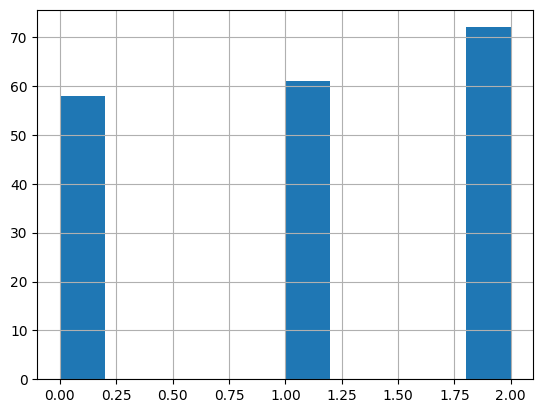

In [4]:
df_test['label'].hist()